# Определение выгодного тарифа для телеком компании
## Описание проекта

Моя роль - аналитик компании `«Мегалайн»` — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: `«Смарт»` и `«Ультра»`. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Цель** - выяснить какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.

**Задачи:**
* [X] сделать предварительный анализ тарифов на небольшой выборке клиентов. 
* [X] проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
### Тариф `«Смарт»`
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
#### Стоимость услуг сверх тарифного пакета:
 * минута разговора: 3 рубля
 * сообщение: 3 рубля
 * 1 Гб интернет-трафика: 200 рублей

### Тариф `«Ультра»`
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
#### Стоимость услуг сверх тарифного пакета:
 * минута разговора: 1 рубль
 * сообщение: 1 рубль
 * 1 Гб интернет-трафика: 150 рублей

**Примечание:**

`«Мегалайн»` всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Описание данных
В нашем распоряжении данные 500 пользователей `«Мегалайна»`: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

#### Таблица `users` (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

#### Таблица `calls` (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

#### Таблица `messages` (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

#### Таблица `internet` (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

#### Таблица `tariffs` (информация о тарифах):
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Примечание:** 

Если объединение таблиц командой merge приводит к ошибке dead kernell, применим join.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a><ul class="toc-item"><li><span><a href="#Вывод-по-данным" data-toc-modified-id="Вывод-по-данным-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по данным</a></span></li></ul><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

In [2]:
# чтение файлов:
# calls
# internet
# messages
# tariffs
# users
try:
    data_calls = pd.read_csv('C:/Users/Mike/Desktop/YP/Sprint6/datasets/calls.csv') 
    data_internet = pd.read_csv('C:/Users/Mike/Desktop/YP/Sprint6/datasets/internet.csv', index_col=0) 
    data_messages = pd.read_csv('C:/Users/Mike/Desktop/YP/Sprint6/datasets/messages.csv')
    data_tariffs = pd.read_csv('C:/Users/Mike/Desktop/YP/Sprint6/datasets/tariffs.csv')
    data_users = pd.read_csv('C:/Users/Mike/Desktop/YP/Sprint6/datasets/users.csv')
except:
    data_calls = pd.read_csv('/datasets/calls.csv')
    data_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
    data_messages = pd.read_csv('/datasets/messages.csv')
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')
    data_users = pd.read_csv('/datasets/users.csv')

### Файл "calls":

In [3]:
display(data_calls.head(10))
data_calls.info()
display(data_calls.describe())
print('Число уникальных пользователей:', len(data_calls['user_id'].value_counts()))
# data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Число уникальных пользователей: 492


In [4]:
# Узнаем долю пропусков
display(data_calls.isna().mean())
# Сколько есть дубликатов
display(data_calls.duplicated().sum())

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

0

* неверный тип данных у столбца "call_date"
* значения в столбце "duration" нужно округлить до 'ceil'(потолка), так как «Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

### Файл "internet"

In [5]:
display(data_internet.head(10))
data_internet.info()
print('Число уникальных пользователей:', len(data_internet['user_id'].value_counts()))
#data_internet_pivot = data_internet.pivot_table(index='user_id', values='mb_used', aggfunc='sum')
#data_internet_pivot

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
Число уникальных пользователей: 497


In [6]:
# Узнаем долю пропусков
display(data_internet.isna().mean())
# Сколько есть дубликатов
display(data_internet.duplicated().sum())

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

0

* дубль-столбец индексов "Unnamed: 0", который нужно будет удалить. Исправлено в момент чтения файла.
* для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.
* неверный тип данных у столбца "session_date"
* количество уникальных id отличается от файла "calls".

### Файл "messages"

In [7]:
display(data_messages.head(10))
data_messages.info()
print('Число уникальных пользователей:', len(data_messages['user_id'].value_counts()))
#data_messages = data_messages.pivot_table(index='user_id', values='id', aggfunc='count')
#data_messages_pivot

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Число уникальных пользователей: 426


In [8]:
# Узнаем долю пропусков
display(data_messages.isna().mean())
# Сколько есть дубликатов
display(data_messages.duplicated().sum())

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

0

* неверный тип данных у столбца "message_date"
* количество уникальных id отличается от других файлов.

### Файл "tariffs"

In [9]:
%%time
display(data_tariffs)
data_tariffs.info()
print('Число тарифов:', len(data_tariffs))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
Число тарифов: 2
CPU times: user 14.7 ms, sys: 606 µs, total: 15.3 ms
Wall time: 13.3 ms


In [10]:
# Узнаем долю пропусков
display(data_tariffs.isna().mean())
# Сколько есть дубликатов
display(data_tariffs.duplicated().sum())

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

0

* в глаза бросились значения столбца "mb_per_month_included".

P.S. Я так понимаю, для первого тарифа 1024 * 15, для второго 1024 * 30 и это нормально. Или же их нужно округлить (floor)?

### Файл "users"

In [11]:
display(data_users.head(10))
data_users.info()
print('Число уникальных пользователей:', len(data_users['user_id'].value_counts()))
#data_users_pivot = data_users.pivot_table(index='tariff', values='user_id', aggfunc='count')
#data_users_pivot

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Число уникальных пользователей: 500


In [12]:
# Узнаем долю пропусков
display(data_users.isna().mean())
# Сколько есть дубликатов
display(data_users.duplicated().sum())

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

0

* неверный тип данных у столбца "reg_date"
* 38 случаев прекращения пользования тарифом

## Вывод по данным

В данных присутствуют неверные типы в столбцах с датой. Есть дублирующий индексы столбец, нужно его удалить. Значения минут в звонках не обработаны, необходимо их округлить к "потолку"(ceil) по условиям оператора. Трафик тоже нужно округлить, но до этого сложить его, сгруппировав по id. Опять же опираясь на условия оператора.

<div class="alert alert-info">В данных есть пропуски, столбец "churn_date". Это говорит о том, что тариф активен. Дубликаты в данных отсутствуют.</div>

Количество уникальных id отличается от других файлов. Возможно это связано с тем, что кто-то не пользуется какой-то услугой (звонки/смс/интернет).

## Подготовка данных

### Игра с типами данных и ошибками

In [13]:
%%time
# Файл calls

# Что было ДО
display(data_calls.head(10))
display(data_internet.info())
# Здесь начинается магия
# Меняем тип данных
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
# Округляем значения к потолку
#data_calls['duration'] = data_calls['duration'].apply(math.ceil)
data_calls['duration'] = np.ceil(data_calls['duration'])
# ПОСЛЕ
display(data_calls.head(10))
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
CPU times: user 72.8 ms, sys: 0 ns, total: 72.8 ms
Wall time: 80.2 ms


* тип данных в столбце "call_date" изменён
* значения столбца "duration" округлены к "потолку"

In [14]:
# Файл "internet"

# Что было ДО
display(data_internet.head(10))
display(data_internet.info())
# Здесь начинается магия
# Меняем тип данных
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
# Удаляем столбец
#data_internet.drop(data_internet.columns[[0]], axis = 1, inplace=True)
# ПОСЛЕ
#display(data_internet.head(10))
data_internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


* тип данных в столбце "session_date" изменён
* столбец "Unnamed: 0" удалён

In [15]:
# Файл "messages"

# Что было ДО
display(data_messages.head(10))
display(data_messages.info())
# Здесь начинается магия
# Меняем тип данных
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
# ПОСЛЕ
display(data_messages.head(10))
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


* тип данных в столбце "message_date" изменён

In [16]:
# Файл "users"

# Что было ДО
display(data_users.head(10))
display(data_users.info())
# Здесь начинается магия
# Меняем тип данных
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
# ПОСЛЕ
display(data_users.head(10))
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


* тип данных в столбце "reg_date" изменён

### Статистика по каждому пользователю:

In [17]:
# Количество сделанных звонков и израсходованных минут разговора по месяцам
# Добавим столбец с месяцем
data_calls['month'] = data_calls['call_date'].astype('datetime64[M]')
# Порядковый номер месяца в году
data_calls['month'] = data_calls['month'].dt.month
# Создадим сводную таблицу
data_calls_pivot = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
data_calls_pivot.head(12)

count      sum
              duration duration
user_id month                  
1000    5           22    159.0
        6           43    172.0
        7           47    340.0
        8           52    408.0
        9           58    466.0
        10          57    350.0
        11          43    338.0
        12          46    333.0
1001    11          59    430.0
        12          63    414.0
1002    6           15    117.0
        7           26    214.0

In [18]:
# Количество отправленных сообщений по месяцам
# Добавим столбец с месяцем
data_messages['month'] = data_messages['message_date'].astype('datetime64[M]')
# Порядковый номер месяца в году
data_messages['month'] = data_messages['month'].dt.month
# Создадим сводную таблицу
data_messages_pivot = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
data_messages_pivot.head(12)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
        10     73
        11     58
        12     70
1002    6       4
        7      11
        8      13
        9       4

In [19]:
# Объем израсходованного интернет-трафика по месяцам
# Добавим столбец с месяцем
data_internet['month'] = data_internet['session_date'].astype('datetime64[M]')
# Порядковый номер месяца в году
data_internet['month'] = data_internet['month'].dt.month
# Создадим сводную таблицу
data_internet_pivot = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
data_internet_pivot.head(12)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10

###  Ранее был использован pivot_table, объединение (merge) с ним таблиц выводит некорректные данные, перезапишу используя группировку и объединю таблицы:
* оставил выше тот способ, потому что мне нравится как он отобразил данные. Месяцы идут по порядку по каждому пользователю и данные хорошо видно.

In [20]:
# Количество сделанных звонков и израсходованных минут разговора по месяцам;
calls = data_calls.groupby(['user_id','month']).agg(
        calls_duration = pd.NamedAgg(column = 'duration', aggfunc = 'sum'),
        calls_number = ( 'id', 'count'),
    ).reset_index()

# Количество отправленных сообщений по месяцам;
msgs = data_messages.groupby(['user_id','month']).agg(
        msgs_number = pd.NamedAgg(column = 'id', aggfunc = 'count'),
    ).reset_index()

# Объем израсходованного интернет-трафика по месяцам;
intrnt = data_internet.groupby(['user_id','month']).agg(
        int_traf = pd.NamedAgg(column = 'mb_used', aggfunc = 'sum'),
    ).reset_index()

In [21]:
# Объединим звонки с сообщениями
data_cm = calls.merge(
    msgs, how='outer', on=['user_id', 'month'])

# Уберём пропуски
data_cm['calls_duration'] = data_cm['calls_duration'].fillna(0)
data_cm['calls_number'] = data_cm['calls_number'].fillna(0)
data_cm['msgs_number'] = data_cm['msgs_number'].fillna(0)

# Результат
display(data_cm)
# Есть ли пропуски
display(data_cm.isna().mean())
# Посмотрим кол-во уникальных пользователей
len(data_cm['user_id'].unique())

,user_id,month,calls_duration,calls_number,msgs_number
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0
...,...,...,...,...,...
3208,1489,8,0.0,0.0,17.0
3209,1489,9,0.0,0.0,32.0
3210,1489,10,0.0,0.0,21.0
3211,1489,11,0.0,0.0,20.0


user_id           0.0
month             0.0
calls_duration    0.0
calls_number      0.0
msgs_number       0.0
dtype: float64

498

### Объединив данные видим 498 пользователей, 2их потеряли, нужно задуматься над этим...

In [22]:
# Добавим сюда данные по трафику
data_cmi = data_cm.merge(
    intrnt, how='outer', on=['user_id', 'month'])

# уберём пропуски
data_cmi['calls_duration'] = data_cmi['calls_duration'].fillna(0)
data_cmi['calls_number'] = data_cmi['calls_number'].fillna(0)
data_cmi['msgs_number'] = data_cmi['msgs_number'].fillna(0)
data_cmi['int_traf'] = data_cmi['int_traf'].fillna(0)

# Результат
display(data_cmi)
# Проверим на пропуски
data_cmi.isna().mean()

,user_id,month,calls_duration,calls_number,msgs_number,int_traf
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30
3210,1489,10,0.0,0.0,21.0,19559.44
3211,1489,11,0.0,0.0,20.0,17491.56
3212,1489,12,0.0,0.0,35.0,17322.51


user_id           0.0
month             0.0
calls_duration    0.0
calls_number      0.0
msgs_number       0.0
int_traf          0.0
dtype: float64

In [23]:
# Добавим данные пользователей
data_cmiu = data_cmi.merge(
    data_users, how='outer', on='user_id')

#!!!! Здесь видно id пользователей без данных. Дальше просто их убираем из выборки.
display(data_cmiu.tail(5))

# Отфильтруем выборку от двух пользователей без данных
data_cmiu = data_cmiu.query('user_id != 1371 & user_id != 1128')
# Результат
display(data_cmiu)
# Проверим на пропуски
data_cmiu.isna().mean()

,user_id,month,calls_duration,calls_number,msgs_number,int_traf,age,churn_date,city,first_name,last_name,reg_date,tariff
3211,1489,10.0,0.0,0.0,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,0.0,0.0,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,0.0,0.0,35.0,17322.51,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


,user_id,month,calls_duration,calls_number,msgs_number,int_traf,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11050.56,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9.0,0.0,0.0,32.0,17206.30,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10.0,0.0,0.0,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,0.0,0.0,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


user_id           0.000000
month             0.000000
calls_duration    0.000000
calls_number      0.000000
msgs_number       0.000000
int_traf          0.000000
age               0.000000
churn_date        0.941817
city              0.000000
first_name        0.000000
last_name         0.000000
reg_date          0.000000
tariff            0.000000
dtype: float64

### Проблемные пользователи найдены. Это user_id - 1371 и 1128. По ним нет необходимых данных(calls_duration, calls_number, msgs_number, int_traf). Удалим их из выборки. Данных по ним нет, но это не значит что с них не взяли деньги за подключение)) Но это уже совсем другая история)

In [24]:
# Переименуем столбец для построения связей между таблицами
data_tariffs.rename(columns = {'tariff_name' : 'tariff'}, inplace = True)
# Добавим данные тарифов
data_cmiut = data_cmiu.merge(
    data_tariffs, how='outer', on='tariff')

# Округлим значения трафика согласно условиям заказчика
data_cmiut['int_traf'] = np.ceil(data_cmiut['int_traf'])

# Дополнение по задани. Уберём ненужные столбцы
del data_cmiut['first_name']
del data_cmiut['last_name']
del data_cmiut['reg_date']
del data_cmiut['age']

# Результат
display(data_cmiut)
# Проверим на пропуски
data_cmiut.isna().mean()


,user_id,month,calls_duration,calls_number,msgs_number,int_traf,churn_date,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,22.0,2254.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,60.0,23234.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,75.0,14004.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,81.0,14056.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,57.0,14569.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11051.0,NaT,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3210,1489,9.0,0.0,0.0,32.0,17207.0,NaT,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3211,1489,10.0,0.0,0.0,21.0,19560.0,NaT,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,11.0,0.0,0.0,20.0,17492.0,NaT,Санкт-Петербург,smart,50,15360,500,550,200,3,3


user_id                  0.000000
month                    0.000000
calls_duration           0.000000
calls_number             0.000000
msgs_number              0.000000
int_traf                 0.000000
churn_date               0.941817
city                     0.000000
tariff                   0.000000
messages_included        0.000000
mb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
dtype: float64

In [25]:
# Проверка на совпадение данных до/после объединения
column = ['calls', 'messages', 'traffic(mb)']
df = pd.DataFrame(np.array([[data_calls['duration'].sum(), data_messages['id'].count(), data_internet['mb_used'].sum()], [data_cmiut['calls_duration'].sum(), data_cmiut['msgs_number'].sum(), data_cmiut['int_traf'].sum()]]),
                   columns=column, index=['before', 'after'])
df

,calls,messages,traffic(mb)
before,1450301.0,123036.0,55305267.73
after,1450301.0,123036.0,55306848.00


Присутствует разница по траффику. Это связано с этой строчкой кода выше:

`# Округлим значения трафика согласно условиям заказчика
data_cmiut['int_traf'] = np.ceil(data_cmiut['int_traf'])`

### Вывод: 
Видны пропуски по данным. Раннее этот вопрос подымался. Ответ на него - какие-то пользователи не пользуются одним из видов услуг.

### Рассчитаем помесячную выручку с каждого пользователя:

In [26]:
# Посмотрим что имеем
display(data_cmiut.head())
# Есть ли пропуски
data_cmiut.isna().mean()
# Какие типы данных
data_cmiut.info()

,user_id,month,calls_duration,calls_number,msgs_number,int_traf,churn_date,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,22.0,2254.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,60.0,23234.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,75.0,14004.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,81.0,14056.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,57.0,14569.0,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   float64       
 2   calls_duration         3214 non-null   float64       
 3   calls_number           3214 non-null   float64       
 4   msgs_number            3214 non-null   float64       
 5   int_traf               3214 non-null   float64       
 6   churn_date             187 non-null    datetime64[ns]
 7   city                   3214 non-null   object        
 8   tariff                 3214 non-null   object        
 9   messages_included      3214 non-null   int64         
 10  mb_per_month_included  3214 non-null   int64         
 11  minutes_included       3214 non-null   int64         
 12  rub_monthly_fee        3214 non-null   int64         
 13  rub

### Преобразуем типы данных у "calls_duration" и "msgs_number" в целочисленные:

In [27]:
display(data_cmiut.astype({
    'calls_duration': 'int32',
    'msgs_number': 'int32'
}).dtypes)

# Конвертируем mb в gb
data_cmiut['int_traf'] = (data_cmiut['int_traf'] / 1024).apply(math.ceil)
# Построим функцию для рассчёта необходимого
def calculate(row):
    fare = row.rub_monthly_fee
    if (row.msgs_number > row.messages_included):
        fare += (row.msgs_number - row.messages_included) * row.rub_per_message
    if (row.calls_duration > row.minutes_included):
        fare += (row.calls_duration - row.minutes_included) * row.rub_per_minute
    if (row.int_traf > row.mb_per_month_included / 1024):
        fare += (row.int_traf - row.mb_per_month_included / 1024) * row.rub_per_gb
    return round(fare,2)

user_id                           int64
month                           float64
calls_duration                    int32
calls_number                    float64
msgs_number                       int32
int_traf                        float64
churn_date               datetime64[ns]
city                             object
tariff                           object
messages_included                 int64
mb_per_month_included             int64
minutes_included                  int64
rub_monthly_fee                   int64
rub_per_gb                        int64
rub_per_message                   int64
rub_per_minute                    int64
dtype: object

In [28]:
# Применим функцию и преобразуем в целочисленные значения данные столбца
data_cmiut['revenue'] = data_cmiut.apply(calculate, axis=1).astype('int')
# Результат
data_cmiut.head(60)

,user_id,month,calls_duration,calls_number,msgs_number,int_traf,churn_date,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5.0,159.0,22.0,22.0,3,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6.0,172.0,43.0,60.0,23,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7.0,340.0,47.0,75.0,14,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8.0,408.0,52.0,81.0,14,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9.0,466.0,58.0,57.0,15,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
5,1000,10.0,350.0,57.0,73.0,15,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
6,1000,11.0,338.0,43.0,58.0,15,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
7,1000,12.0,333.0,46.0,70.0,10,NaT,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950
8,1003,8.0,380.0,55.0,37.0,9,NaT,Москва,ultra,1000,30720,3000,1950,150,1,1,1950
9,1003,9.0,961.0,134.0,91.0,13,NaT,Москва,ultra,1000,30720,3000,1950,150,1,1,1950


### Вывод по этапу работы:
* Для корректной работы нужны хорошо подготовленные данные
* Есть пользователи (2 человека) без необходимых данных, такие нам не нужны
* Группировка данных показала необходимое нам
* Пользователи зачастую выходят за рамки своих пакетных тарифов
* Выручка по клиентам посчитана

## Анализ данных

In [29]:
# Посмотрим какие столбцы есть, чтобы было видно к чему можно обращаться
data_cmiut.columns

Index(['user_id', 'month', 'calls_duration', 'calls_number', 'msgs_number',
       'int_traf', 'churn_date', 'city', 'tariff', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'revenue'],
      dtype='object')

 Выход на допы в smart'e 74.6%
 Выход на допы в ultra 13.6%


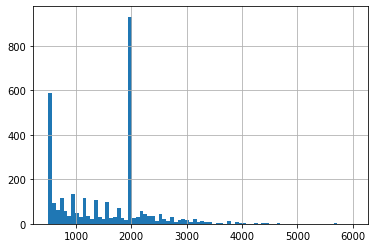

In [30]:
# Посмотрим на гистограмму столбца выручки
data_cmiut['revenue'].hist(bins=80, range=(500, 6000))
# Количество выходов за пределы базовой (550р.) стоимости тарифа "smart"
smart_not_550 = len(data_cmiut.query('tariff == "smart" & revenue != 550'))
# Количество уверенных пользователей тарифа "smart"
smart_550 = len(data_cmiut.query('tariff == "smart" & revenue == 550'))
# Всего купленных smartОВ в этой выборке
smart_length = len(data_cmiut.query('tariff == "smart"'))
# Разница по smartАМ
diff_550_not_550 = smart_not_550 / smart_length
print(f' Выход на допы в smart\'e {diff_550_not_550:.1%}')

ultra_not_1950 = len(data_cmiut.query('tariff == "ultra" & revenue != 1950'))
# Количество уверенных пользователей тарифа "ultra"
ultra_1950 = len(data_cmiut.query('tariff == "ultra" & revenue == 1950'))
# Всего купленных ultra в этой выборке
ultra_length = len(data_cmiut.query('tariff == "ultra"'))
# Разница по ultra
diff_1950_not_1950 = ultra_not_1950 / ultra_length
print(f' Выход на допы в ultra {diff_1950_not_1950:.1%}')

### Помнится ранее в курсе было сказано, что присутствие двух пиков на гистограмме говорит о работе второй линии на конвеере... Так вот: здесь мы видим работу двух тарифов: smart и ultra. Пики на значении 550 и 1950, такова их стоимость. Что ещё видно:
* Пользователи тарифа `smart` не особо умно рассчитывают свои возможности и уходят на доп пакеты в ![progress](http://www.yarntomato.com/percentbarmaker/button.php?barPosition=74.6&leftFill=%23FF0000 "progress") случаев.
* Пользователи тарифа `ultra` более разумно (13.6%) используют функционал тарифа.

In [31]:
# Посмотрим какие столбцы есть, чтобы было видно к чему можно обращаться
data_cmiut.columns

Index(['user_id', 'month', 'calls_duration', 'calls_number', 'msgs_number',
       'int_traf', 'churn_date', 'city', 'tariff', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'revenue'],
      dtype='object')

### Smart

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_duration, dtype: float64

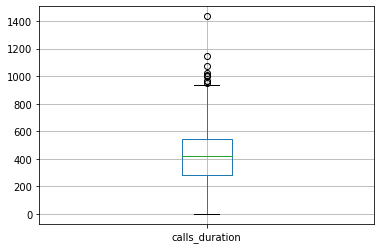

<AxesSubplot:>

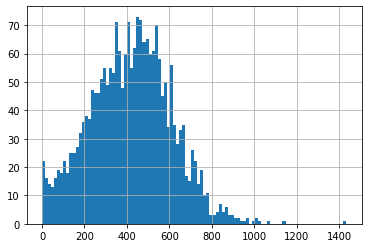

In [32]:
# Минуты разговора в smart
display(data_cmiut.query('tariff == "smart"')['calls_duration'].describe())
data_cmiut.query('tariff == "smart"').boxplot('calls_duration')
plt.show()
data_cmiut.query('tariff == "smart"')['calls_duration'].hist(bins=100)

* нормальное распределение;
* звонки очень востребованы.

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: msgs_number, dtype: float64

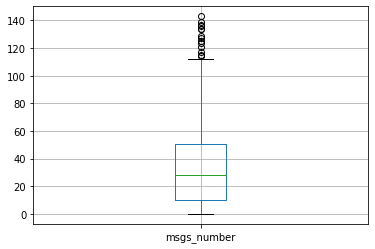

<AxesSubplot:>

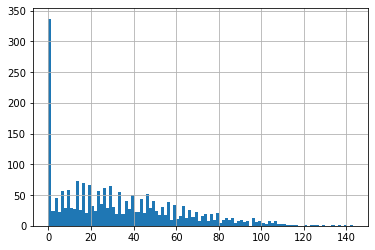

In [33]:
# Сообщений в месяц smart
display(data_cmiut.query('tariff == "smart"')['msgs_number'].describe())
data_cmiut.query('tariff == "smart"').boxplot('msgs_number')
plt.show()
data_cmiut.query('tariff == "smart"')['msgs_number'].hist(bins=100)

* Много клиентов не пользуются сообщениями.

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: int_traf, dtype: float64

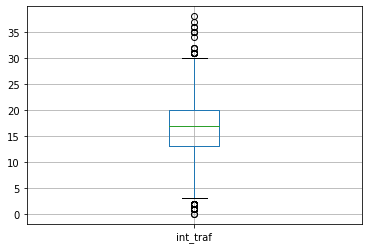

<AxesSubplot:>

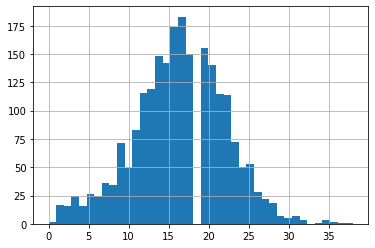

In [34]:
# Трафика в месяц smart
display(data_cmiut.query('tariff == "smart"')['int_traf'].describe())
data_cmiut.query('tariff == "smart"').boxplot('int_traf')
# Разделим между собой
plt.show()
data_cmiut.query('tariff == "smart"')['int_traf'].hist(bins=40)

* нормальное распределение;
* услуга по трафику востребована.

### Пользователям тарифа smart в среднем в месяц нужно:
* 418 минут разговоров
* 34 сообщения
* 16.33 gb трафика

### Ultra

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_duration, dtype: float64

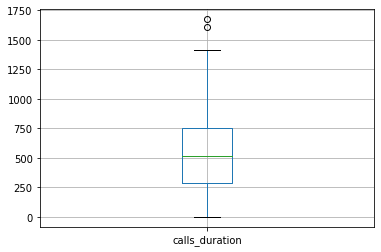

<AxesSubplot:>

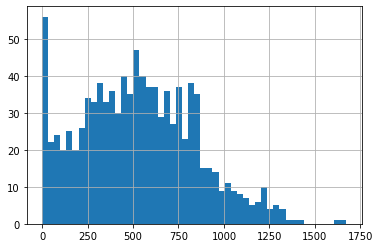

In [35]:
# Минуты разговора в ultra
display(data_cmiut.query('tariff == "ultra"')['calls_duration'].describe())
data_cmiut.query('tariff == "ultra"').boxplot('calls_duration')
plt.show()
data_cmiut.query('tariff == "ultra"')['calls_duration'].hist(bins=50)

* есть пик на 0, для кого-то данная услуга не востребована;
* в целом услуга популярна

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: msgs_number, dtype: float64

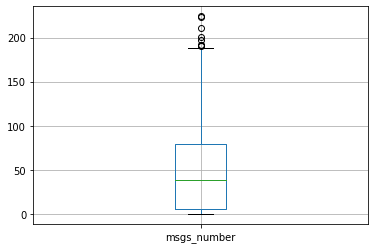

<AxesSubplot:>

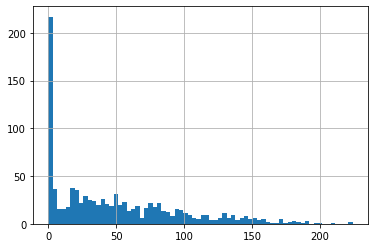

In [36]:
# Сообщений в месяц ultra
display(data_cmiut.query('tariff == "ultra"')['msgs_number'].describe())
data_cmiut.query('tariff == "ultra"').boxplot('msgs_number')
plt.show()
data_cmiut.query('tariff == "ultra"')['msgs_number'].hist(bins=70)

* сообщения уходят в прошлое

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: int_traf, dtype: float64

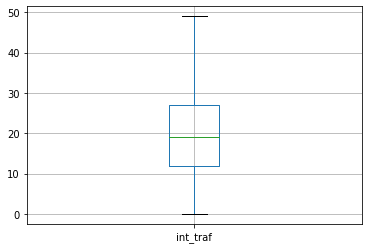

<AxesSubplot:>

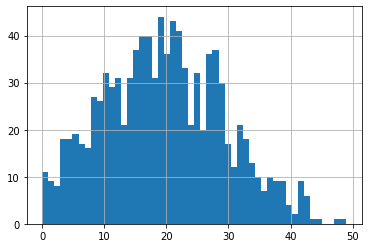

In [37]:
# Трафика в месяц ultra
display(data_cmiut.query('tariff == "ultra"')['int_traf'].describe())
data_cmiut.query('tariff == "ultra"').boxplot('int_traf')
plt.show()
data_cmiut.query('tariff == "ultra"')['int_traf'].hist(bins=50)

* нормальное распределение;
* данная услуга востребована.

### Пользователям тарифа ultra в среднем в месяц нужно:
* 527 минут разговоров
* 49 сообщений
* 19.5 gb трафика

### Сравнение звонков по `smart` и `ultra`:

<AxesSubplot:>

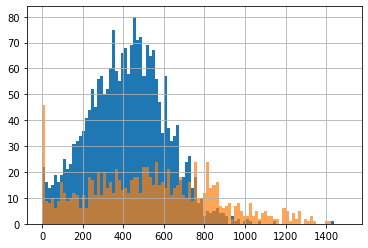

In [38]:
data_cmiut.query('tariff == "smart"')['calls_duration'].hist(bins=100, range=(0, 1500), alpha = 1)
data_cmiut.query('tariff == "ultra"')['calls_duration'].hist(bins=100, range=(0, 1500), alpha = 0.7)

- есть пики на 0;
- среднее значение в ultra выше.

### Сравнение сообщений по `smart` и `ultra`:

<AxesSubplot:>

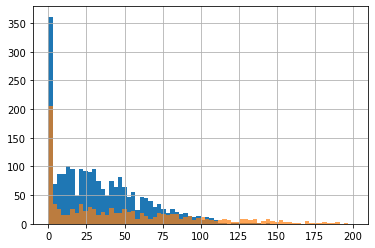

In [39]:
data_cmiut.query('tariff == "smart"')['msgs_number'].hist(bins=70, range=(0, 200), alpha = 1)
data_cmiut.query('tariff == "ultra"')['msgs_number'].hist(bins=70, range=(0, 200), alpha = 0.7)

- услуга не сильно востребована на обоих тарифах;
- среднее значение в ultra выше.

### Сравнение траффика по `smart` и `ultra`:

<AxesSubplot:>

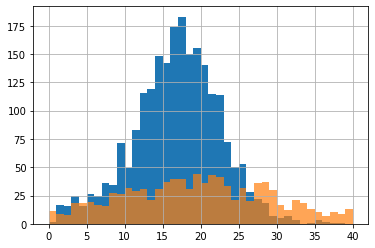

In [40]:
data_cmiut.query('tariff == "smart"')['int_traf'].hist(bins=40, range=(0, 40), alpha = 1)
data_cmiut.query('tariff == "ultra"')['int_traf'].hist(bins=40, range=(0, 40), alpha = 0.7)

- очень востребованная услуга;
- среднее значение в ultra выше.

In [41]:
# данные по звонкам
data_cmiut.pivot_table(index= 'tariff', values= 'calls_duration', aggfunc= ['mean', 'var','std'])

,mean,var,std
,calls_duration,calls_duration,calls_duration
tariff,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


In [42]:
# данные по сообщениям
data_cmiut.pivot_table(index= 'tariff', values= 'msgs_number', aggfunc= ['mean', 'var','std'])

,mean,var,std
,msgs_number,msgs_number,msgs_number
tariff,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


In [43]:
# данные по траффику
data_cmiut.pivot_table(index= 'tariff', values= 'int_traf', aggfunc= ['mean', 'var','std'])

,mean,var,std
,int_traf,int_traf,int_traf
tariff,,,
smart,16.328847,33.028705,5.747061
ultra,19.494416,97.091686,9.853511


In [44]:
# данные по выручке
data_cmiut.pivot_table(index= 'tariff', values= 'revenue', aggfunc= ['mean', 'var','std', 'sum'])

,mean,var,std,sum
,revenue,revenue,revenue,revenue
tariff,,,,
smart,1289.973531,669785.708006,818.404367,2875351
ultra,2070.152284,141516.745079,376.187114,2039100


In [45]:
# Отток пользователей
print('Всего отток:', data_cmiut['churn_date'].count())
print('Отток на smart:', data_cmiut[data_cmiut['tariff'] == 'smart']['churn_date'].count())
print('Отток на ultra:', data_cmiut[data_cmiut['tariff'] == 'ultra']['churn_date'].count())

Всего отток: 187
Отток на smart: 111
Отток на ultra: 76


### На smart отток выше, чем на ultra.

### Вывод по анализу:
Две услуги из трёх пользуются большим спросом на обоих тарифах, это: интернет и звонки.

Сообщения не востребованы. Так как есть интернет-мессенджеры. По мере развития качества интернета в отдалённых местах звонки тоже уйдут в небытие.

Средние показатели на тарифе ultra выше, чем на smart. Но суммарная выручка больше на тарифе smart, хотя средняя выручка больше на ultra. Это связано с колличеством пользователей тарифа smart, просто их больше.

## Проверка гипотез

### Гипотезы

#### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **равны**, т.е. средние значения равны.

Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **не равны**, т.е. средние значения не равны.


In [46]:
smpl_1 = data_cmiut[data_cmiut['tariff'] == 'smart']['revenue'] 
smpl_2 = data_cmiut[data_cmiut['tariff'] == 'ultra']['revenue'] 
#smpl_1 = data_cmiut.query('tariff == "smart"')['revenue'] 
#smpl_2 = data_cmiut.query('tariff == "ultra"')['revenue'] 
results = st.ttest_ind(smpl_1, smpl_2)
alpha = .05

print(f'Средняя выручка smart: {smpl_1.mean()}р.')
print(f'Средняя выручка ultra: {smpl_2.mean()}р.')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')
#variance_ultra_rev = np.var(data_cmiut.query('tariff == "ultra"')['revenue'], ddof=1)
#print('Дисперсия:', variance_ultra_rev) 
#variance_ultra_rev_s = np.var(data_cmiut.query('tariff == "smart"')['revenue'], ddof=1)
#print('Дисперсия:', variance_ultra_rev_s) 

Средняя выручка smart: 1289.9735307312696р.
Средняя выручка ultra: 2070.1522842639592р.
p-значение: 1.4229814360764067e-160
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, т.е. маловероятна случайность результатов теста гипотезы.

#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Н0 - Cредняя выручка пользователей из Москвы и выручка пользователей из других регионов **равны**, т.е. средние значения равны.

Н1 - Cредняя выручка пользователей из Москвы и выручка пользователей из других регионов **не равны**, т.е. средние значения не равны.


In [47]:
#smple_1 = data_cmiut.query('city == "Москва"')['revenue'] 
#smple_2 = data_cmiut.query('city != "Москва"')['revenue'] 
smple_1 = data_cmiut[data_cmiut['city'] == 'Москва']['revenue'] 
smple_2 = data_cmiut[data_cmiut['city'] != 'Москва']['revenue'] 
results_с = st.ttest_ind(smple_1, smple_2)
alpha = .05

print(f'Средняя выручка в Москве: {smple_1.mean()}р.')
print(f'Средняя выручка в других регионах: {smple_2.mean()}р.')

print('p-значение:', results_с.pvalue)
if results_с.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')
#variance_ultra_rev = np.var(data_cmiut.query('city == "Москва"')['revenue'], ddof=1)
#print('Дисперсия:', variance_ultra_rev) 
#variance_ultra_rev_s = np.var(data_cmiut.query('city != "Москва"')['revenue'], ddof=1)
#print('Дисперсия:', variance_ultra_rev_s) 

Средняя выручка в Москве: 1546.7135842880523р.
Средняя выручка в других регионах: 1524.9362274298885р.
p-значение: 0.5440152911670224
Опровергнуть нулевую гипотезу нельзя


p-значение велико, что дает основание принять предположение об отсутствии различий между выручками разных городов.

In [48]:
rev_s = data_cmiut[data_cmiut['tariff'] == 'smart']['revenue'].sum()
print(f'Выручка smart: {rev_s}р.')
rev_u = data_cmiut[data_cmiut['tariff'] == 'ultra']['revenue'].sum()
print(f'Выручка ultra: {rev_u}р.')

Выручка smart: 2875351р.
Выручка ultra: 2039100р.


## Общий вывод

Пользователи тарифа smart выходят за рамки пакета услуг намного чаще пользователей тарифа ultra. Мало кому понравится тратить больше аббонентской платы. Итогом является завершение пользования тарифом. В smart число таких пользователей выше. Соответственно, есть проблема с оттоком. Присутствует нехватка трафика на smart. По сообщениям и минутам они укладываются. Можно увеличить порог по трафику до 17gb. Проблемы пользователей исчезнут, как и прибыль мегалайн. С точки  зрения бизнеса, лучше сделать конструктор тарифа, создать некую иллюзию свободы выбора. Пакеты с выше условий оставить как были - платными за 1 гб. В таком случае пользователь будет винить себя в случае выхода за рамки, а не компанию и будет в следующем месяце исправлять положение дел (в конструкторе или ограничивать себя в пользовании). Всё в его руках.

По самим тарифам:
* smart не такой уж и smart;
* ultra в большей мере удовлетворяет потребности пользователей;
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

<div class="alert alert-info"> <b>✔️ Дополнение к выводу:</b> 

Какой тариф приносит больше денег?
    
    smart 

Суммарная выручка по:
    
    smart - 2875351 р.
    ultra - 2039100 р.  

Что нужно сделать?
    
    скорректировать рекламный бюджет
</div>